In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"C:\Users\OM RAJ PANDEY\Desktop\DSData-master\DSData-master\Telecom_customer_churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data Exploration

In [4]:
#dropping the customer-id column
df.drop('customerID',axis='columns', inplace=True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

so, many columns are object

In [5]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

It is a string we have to convert it into float

In [6]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [7]:
pd.to_numeric(df.TotalCharges, errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [8]:
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()]#convert string to numbers

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [9]:
df.shape

(7043, 20)

In [10]:
df.iloc[488]['TotalCharges']

' '

In [11]:
# we are now dropping the all blank rows
df1=df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [12]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [14]:
df1.TotalCharges=pd.to_numeric(df1.TotalCharges)#converting string to numbers

In [15]:
df1.TotalCharges.dtypes

dtype('float64')

# Data visualization

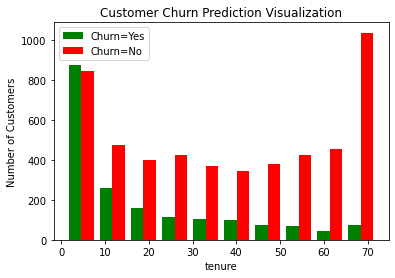

In [24]:
tenure_churn_no=df1[df1.Churn=='No'].tenure
tenure_churn_yes=df1[df1.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Prediction Visualization")

plt.hist([tenure_churn_yes, tenure_churn_no], color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

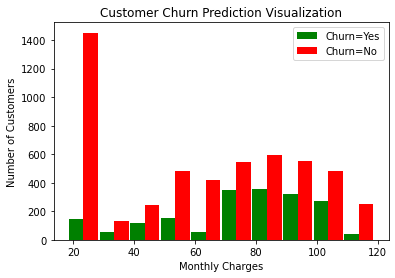

In [26]:
mc_churn_no=df1[df1.Churn=='No'].MonthlyCharges
mc_churn_yes=df1[df1.Churn=='Yes'].MonthlyCharges

plt.xlabel("Monthly Charges")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Prediction Visualization")

blood_sugar_men=[113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women=[67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([mc_churn_yes, mc_churn_no],  rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [34]:
def print_unique_col_values(df):
    for column in df:
         if df[column].dtypes=='object':
                 print(f'{column} : {df[column].unique()}')
       
    
   

In [35]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [36]:
df1.replace('No internet service','No',inplace=True)#replacing the column values
df1.replace('No phone service','No',inplace=True)

In [37]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [38]:
yes_no_columns=['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
               'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes':1, 'No':0},inplace=True)# replacing the column values in yes and no

In [39]:
for col in df1:
    print(f'{col}: {df1[col].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [40]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)# replacing the column values in 1 and 0

In [41]:
df1['gender'].unique()

array([1, 0], dtype=int64)

In [43]:
df2 = pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod'])# creating dummy columns
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [44]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [45]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [46]:
#Using minmaxscaler we are scaling some columns
cols_to_scale=['tenure', 'MonthlyCharges', 'TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()

df2[cols_to_scale]= scaler.fit_transform(df2[cols_to_scale])

In [48]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

# Model Building

In [49]:
x=df2.drop('Churn', axis='columns')# dividing the data into x and y
y=df2['Churn']

# Train Test Split

In [50]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=5)

In [53]:
lr=LogisticRegression()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
adb=AdaBoostClassifier()

lr.fit(x_train, y_train)
dt.fit(x_train, y_train)
rf.fit(x_train, y_train)
adb.fit(x_train, y_train)

AdaBoostClassifier()

In [54]:
# classification score
print("lr classification score", lr.score(x_train, y_train))
print("dt classification score", dt.score(x_train, y_train))
print("rf classification score", rf.score(x_train, y_train))
print("adb classification score", adb.score(x_train, y_train))

lr classification score 0.8076444444444445
dt classification score 0.9973333333333333
rf classification score 0.9973333333333333
adb classification score 0.8149333333333333


# Model Evaluation

In [55]:
lr_ypred=lr.predict(x_test)
dt_ypred=dt.predict(x_test)
rf_ypred=rf.predict(x_test)
adb_ypred=adb.predict(x_test)

In [56]:
# Using confusion matrix in order to evaluate model accuracy
lr_conf_mat=confusion_matrix(y_test, lr_ypred)
print(lr_conf_mat)

[[890 109]
 [180 228]]


In [61]:
dt_conf_mat=confusion_matrix(y_test, dt_ypred)
print(dt_conf_mat)

[[788 211]
 [207 201]]


In [60]:
rf_conf_mat=confusion_matrix(y_test, rf_ypred)
print(rf_conf_mat)

[[892 107]
 [198 210]]


In [59]:
adb_conf_mat=confusion_matrix(y_test, adb_ypred)
print(adb_conf_mat)

[[898 101]
 [190 218]]


# Checking classification report for each model

In [62]:
lr_report=classification_report(y_test, lr_ypred)
print(lr_report)

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       999
           1       0.68      0.56      0.61       408

    accuracy                           0.79      1407
   macro avg       0.75      0.72      0.74      1407
weighted avg       0.79      0.79      0.79      1407



In [63]:
dt_report=classification_report(y_test, dt_ypred)
print(dt_report)

              precision    recall  f1-score   support

           0       0.79      0.79      0.79       999
           1       0.49      0.49      0.49       408

    accuracy                           0.70      1407
   macro avg       0.64      0.64      0.64      1407
weighted avg       0.70      0.70      0.70      1407



In [64]:
rf_report=classification_report(y_test, rf_ypred)
print(rf_report)

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       999
           1       0.66      0.51      0.58       408

    accuracy                           0.78      1407
   macro avg       0.74      0.70      0.72      1407
weighted avg       0.77      0.78      0.77      1407



In [65]:
adb_report=classification_report(y_test, adb_ypred)
print(adb_report)

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       999
           1       0.68      0.53      0.60       408

    accuracy                           0.79      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.78      0.79      0.78      1407



# ROC AUC CURVE:

In [66]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import plot_roc_curve

#importing the roc and auc from sklearn and predict the x_test and checking the roc_auc_score
print(roc_auc_score(y_test, lr.predict(x_test)))
print(roc_auc_score(y_test, dt.predict(x_test)))
print(roc_auc_score(y_test, rf.predict(x_test)))
print(roc_auc_score(y_test, adb.predict(x_test)))

0.7248572101513279
0.6407179238061591
0.7037993876229169
0.7166063121945474


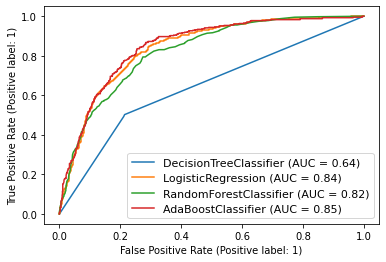

In [67]:
# lets find the roc curve to check the best fitted model
disp=plot_roc_curve(dt, x_test, y_test)
plot_roc_curve(lr, x_test, y_test, ax=disp.ax_)
plot_roc_curve(rf, x_test, y_test, ax=disp.ax_)
plot_roc_curve(adb, x_test, y_test, ax=disp.ax_)
plt.legend(prop={'size':11}, loc='lower right')

As per above observation we can see AdaBoostClassifier give the best score

# K-Fold Cross Validation

In [68]:
from sklearn.model_selection import KFold, cross_val_score

k_f=KFold(n_splits=4, shuffle=True)
k_f

KFold(n_splits=4, random_state=None, shuffle=True)

In [69]:
print("Mean of Cross Validation score for Ada Boost model","=>", cross_val_score(adb, x, y, cv=5).mean())

Mean of Cross Validation score for Ada Boost model => 0.8060277761770299


# Hyperparameter Tuning

In [70]:
from sklearn.model_selection import GridSearchCV
grid=dict()
grid['n_estimators']=[10, 50, 100, 500]
grid['learning_rate']=[0.0001, 0.001, 0.01, 0.1, 1.0]
grid['algorithm']=['SAMME', 'SAMME.R']
grid_search=GridSearchCV(estimator=AdaBoostClassifier(), param_grid=grid, n_jobs=-1, cv=10, scoring='accuracy')
# execute the grid search
grid_result=grid_search.fit(x, y)
# summarize the best score and configuration
print("Best: %f using %s" %(grid_result.best_score_, grid_result.best_params_))

Best: 0.804748 using {'algorithm': 'SAMME.R', 'learning_rate': 0.1, 'n_estimators': 500}


# Saving Model

In [71]:
adb=AdaBoostClassifier()
adb.fit(x, y)

AdaBoostClassifier()

In [72]:
import joblib

In [73]:
joblib.dump(adb, 'model_joblib_adb')

['model_joblib_adb']

In [74]:
model=joblib.load('model_joblib_adb')